In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from Gonzales import Gonzales
from math import sqrt
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib as mpl

# Testing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering

In [2]:
DATA_PATH = "data"

In [3]:
os.listdir(DATA_PATH)

['Team_Attributes.csv',
 'Player.csv',
 'Match.csv',
 'League.csv',
 'Country.csv',
 'Player_Attributes.csv',
 'Team.csv']

In [4]:
player_attr_raw = pd.read_csv(os.path.join(DATA_PATH, 'Player_Attributes.csv'))
player_attr_raw.shape

(183978, 42)

In [5]:
player_attr_uncleaned = player_attr_raw.dropna()
print(player_attr_uncleaned.shape)
player_attr_uncleaned.head()

(180354, 42)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
player_attr = player_attr_uncleaned.groupby('player_api_id').mean()

In [7]:
player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10410 entries, 2625 to 750584
Data columns (total 37 columns):
id                    10410 non-null float64
player_fifa_api_id    10410 non-null float64
overall_rating        10410 non-null float64
potential             10410 non-null float64
crossing              10410 non-null float64
finishing             10410 non-null float64
heading_accuracy      10410 non-null float64
short_passing         10410 non-null float64
volleys               10410 non-null float64
dribbling             10410 non-null float64
curve                 10410 non-null float64
free_kick_accuracy    10410 non-null float64
long_passing          10410 non-null float64
ball_control          10410 non-null float64
acceleration          10410 non-null float64
sprint_speed          10410 non-null float64
agility               10410 non-null float64
reactions             10410 non-null float64
balance               10410 non-null float64
shot_power            10410 non-

In [8]:
player_attr.describe()

,id,player_fifa_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,...,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000
mean,92351.990724,169226.756245,66.921400,72.146648,52.976345,47.924877,56.060827,60.516626,47.153209,57.151148,...,55.839301,53.386598,46.169447,49.441334,47.221656,14.926049,16.255524,21.279625,16.327302,16.637667
std,53124.922860,55735.405417,6.163918,5.727270,16.201049,18.146559,15.618877,13.450920,17.327318,16.885015,...,14.067049,13.830201,20.033629,20.356592,20.558654,16.753135,15.427446,16.142425,15.644251,16.763278
min,3.000000,2.000000,43.750000,51.000000,6.000000,5.000000,8.000000,10.571429,3.750000,5.142857,...,8.000000,9.428571,5.000000,6.000000,6.000000,1.833333,2.000000,3.260870,2.000000,2.000000
25%,46488.000000,157052.250000,62.950595,68.087945,43.551948,32.487903,49.190625,56.000000,33.250000,49.734211,...,47.250000,44.436923,25.000000,29.000000,25.566892,7.819519,9.303360,11.000000,9.285714,9.222222
50%,92208.750000,186730.500000,66.820856,72.093074,56.571429,50.000000,58.724747,63.066667,49.325758,61.444444,...,57.707143,54.711310,50.000000,55.312500,52.318841,10.200000,12.200000,15.312500,12.200000,12.180195
75%,138740.500000,204618.000000,71.000000,76.000000,64.833333,63.166667,66.714286,69.110360,60.757500,69.000000,...,66.000000,63.618132,64.142857,67.070617,65.166667,13.000000,15.000000,24.649265,15.000000,15.000000
max,183973.500000,234141.000000,92.192308,95.230769,89.357143,92.230769,93.111111,95.181818,90.789474,96.461538,...,95.681818,89.565217,89.666667,90.200000,94.366667,89.863636,86.875000,87.133333,91.625000,90.954545


In [27]:
vectorized_players_df = player_attr.drop(columns=['id','player_fifa_api_id',
                                                'overall_rating',
                                            'potential'])
features = ['finishing', 'heading_accuracy', 'crossing',
            'marking', 'standing_tackle', 'sliding_tackle',
            'gk_diving', 'gk_handling', 'gk_positioning']

In [10]:
vectorized_players_df.shape

(10410, 33)

In [11]:
vectorized_players_df.describe()

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,...,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000,10410.000000
mean,52.976345,47.924877,56.060827,60.516626,47.153209,57.151148,50.504948,47.305675,55.169211,61.304312,...,55.839301,53.386598,46.169447,49.441334,47.221656,14.926049,16.255524,21.279625,16.327302,16.637667
std,16.201049,18.146559,15.618877,13.450920,17.327318,16.885015,17.283679,16.319041,13.044276,14.573688,...,14.067049,13.830201,20.033629,20.356592,20.558654,16.753135,15.427446,16.142425,15.644251,16.763278
min,6.000000,5.000000,8.000000,10.571429,3.750000,5.142857,6.666667,7.000000,11.333333,9.000000,...,8.000000,9.428571,5.000000,6.000000,6.000000,1.833333,2.000000,3.260870,2.000000,2.000000
25%,43.551948,32.487903,49.190625,56.000000,33.250000,49.734211,38.910178,35.290373,47.238571,57.008065,...,47.250000,44.436923,25.000000,29.000000,25.566892,7.819519,9.303360,11.000000,9.285714,9.222222
50%,56.571429,50.000000,58.724747,63.066667,49.325758,61.444444,52.750000,48.000000,57.000000,64.500000,...,57.707143,54.711310,50.000000,55.312500,52.318841,10.200000,12.200000,15.312500,12.200000,12.180195
75%,64.833333,63.166667,66.714286,69.110360,60.757500,69.000000,63.632895,59.727273,64.529390,70.461538,...,66.000000,63.618132,64.142857,67.070617,65.166667,13.000000,15.000000,24.649265,15.000000,15.000000
max,89.357143,92.230769,93.111111,95.181818,90.789474,96.461538,92.571429,90.488889,94.155556,95.769231,...,95.681818,89.565217,89.666667,90.200000,94.366667,89.863636,86.875000,87.133333,91.625000,90.954545


In [12]:
description = vectorized_players_df.describe()
vectorized_players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10410 entries, 2625 to 750584
Data columns (total 33 columns):
crossing              10410 non-null float64
finishing             10410 non-null float64
heading_accuracy      10410 non-null float64
short_passing         10410 non-null float64
volleys               10410 non-null float64
dribbling             10410 non-null float64
curve                 10410 non-null float64
free_kick_accuracy    10410 non-null float64
long_passing          10410 non-null float64
ball_control          10410 non-null float64
acceleration          10410 non-null float64
sprint_speed          10410 non-null float64
agility               10410 non-null float64
reactions             10410 non-null float64
balance               10410 non-null float64
shot_power            10410 non-null float64
jumping               10410 non-null float64
stamina               10410 non-null float64
strength              10410 non-null float64
long_shots            10410 non-

In [13]:
vectorized_players_df.median()

crossing              56.571429
finishing             50.000000
heading_accuracy      58.724747
short_passing         63.066667
volleys               49.325758
dribbling             61.444444
curve                 52.750000
free_kick_accuracy    48.000000
long_passing          57.000000
ball_control          64.500000
acceleration          68.000000
sprint_speed          68.289916
agility               65.833333
reactions             64.736842
balance               65.666667
shot_power            63.000000
jumping               66.953463
stamina               67.181818
strength              67.894704
long_shots            55.043478
aggression            62.301515
interceptions         54.796552
positioning           57.633971
vision                57.707143
penalties             54.711310
marking               50.000000
standing_tackle       55.312500
sliding_tackle        52.318841
gk_diving             10.200000
gk_handling           12.200000
gk_kicking            15.312500
gk_posit

In [14]:
vectorized_players_df.head()

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,,,,,,,,,,,,,,,,,,,,,
2625,50.142857,47.285714,46.285714,56.500000,38.000000,54.142857,50.000000,49.928571,65.571429,59.142857,...,55.285714,61.928571,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571
2752,36.428571,37.428571,75.333333,54.809524,20.428571,44.857143,30.428571,18.857143,59.571429,55.571429,...,52.428571,35.428571,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238
2768,42.238095,42.761905,66.666667,64.714286,28.761905,40.238095,51.761905,20.047619,57.000000,56.380952,...,57.761905,31.904762,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238
2770,61.866667,67.666667,67.800000,72.533333,67.133333,75.066667,79.800000,68.666667,70.266667,76.733333,...,71.600000,63.933333,30.200000,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000
2790,70.000000,37.400000,55.200000,68.000000,43.000000,60.800000,67.000000,55.400000,69.800000,66.800000,...,60.000000,55.400000,74.600000,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000


In [29]:
vectorized_players = vectorized_players_df.values
sf = vectorized_players_df[features].values

In [30]:
cdict = mpl.colors.ListedColormap(['red', 'green', 'blue', 'gray'])

[0.50217714 0.23553466 0.06893308 0.04472513 0.02450037 0.01084883
 0.01025395 0.00972117 0.0089485  0.00817078 0.00689633 0.00601586
 0.00565602 0.0056389  0.00496647 0.00472569 0.00450798 0.0041327
 0.004061   0.00376371 0.00335614 0.00334708 0.00315456 0.0029797
 0.00271022 0.00205486 0.00171493 0.00131766 0.00115562 0.00109364
 0.0010712  0.00094639 0.00091972]


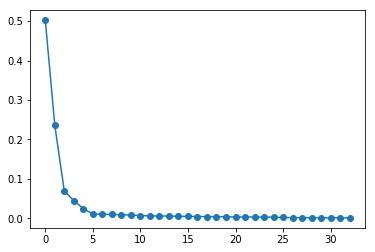

[0.5742066  0.29766114 0.05744953 0.03955677 0.01495664 0.00586711
 0.0039731  0.003795   0.00253411]


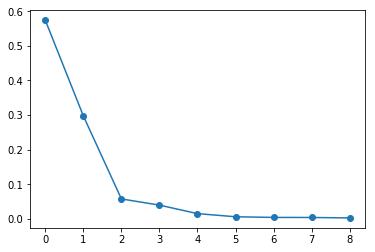

In [35]:
pca = PCA()
pca_dataset = pca.fit_transform(vectorized_players)
print(pca.explained_variance_ratio_)
plt.plot(range(len(vectorized_players[0])), pca.explained_variance_ratio_, '-o')
plt.show()

pca2 = PCA()
sf_pca = pca2.fit_transform(sf)
print(pca2.explained_variance_ratio_)
plt.plot(range(len(sf[0])), pca2.explained_variance_ratio_, '-o')
plt.show()

In [51]:
def plot_clusters(x, y, c, cmap=cdict):
    plt.scatter(x=x, y=y, c=c, cmap=cmap)
    plt.show()

# Gonzales Clustering

[[50.14285714 47.28571429 46.28571429 56.5        38.         54.14285714
  50.         49.92857143 65.57142857 59.14285714 66.85714286 63.28571429
  66.42857143 49.71428571 66.21428571 66.71428571 58.71428571 77.28571429
  55.78571429 56.85714286 71.28571429 62.07142857 50.35714286 55.28571429
  61.92857143 62.92857143 63.85714286 56.57142857 12.42857143 12.85714286
  19.07142857 10.35714286 10.42857143]
 [11.          6.         12.         16.          6.          9.
  12.         14.         21.         14.         32.         19.
  23.         36.         24.         26.         38.         27.
  58.          8.         16.         11.          6.         26.
  18.          5.         11.         13.         62.         64.
  59.         64.         60.        ]
 [83.34615385 92.23076923 69.26923077 88.80769231 87.53846154 96.46153846
  87.69230769 84.11538462 76.61538462 95.76923077 95.30769231 90.84615385
  94.38461538 92.53846154 92.23076923 80.30769231 69.65384615 77.53846154


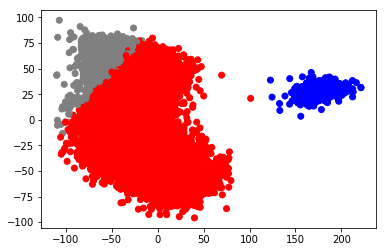

{0.0, 1.0, 2.0}
[[47.28571429 46.28571429 50.14285714 62.92857143 63.85714286 56.57142857
  12.42857143 12.85714286 10.35714286]
 [16.375      17.         17.75       15.625      21.5        11.
  83.5        86.875      91.625     ]
 [87.64       85.2        77.         17.64       20.28       16.88
  13.08        9.28       10.96      ]]


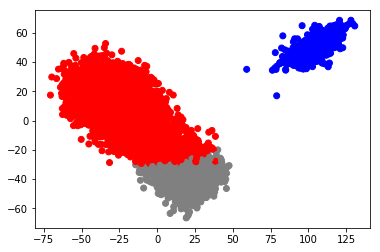

In [60]:
clusters, three_cen_cost, three_mean_cost, centers = Gonzales(vectorized_players, vectorized_players[0,:], k=3)
print(centers)
plot_clusters(pca_dataset[:,0], pca_dataset[:,1], clusters[:,-1])

clusters, three_cen_cost, three_mean_cost, centers = Gonzales(sf, sf[0,:], k=3)
print(centers)
plot_clusters(sf_pca[:,0], sf_pca[:, 1], clusters[:, -1])

# KMeans++

In [53]:
def dist(a,b):
    return np.linalg.norm(a-b)

def KPP(data, c1, k=3):
    n = len(data)
    
    assignments = dict([(_, 0) for _ in range(n)])
    clusters = np.empty([k,len(c1)])
    clusters[0, :] = c1
    
    for i in range(1,k):
        weights = np.array([dist(d, clusters[assignments[idx], :])**2 for idx,d in enumerate(data)])
        weights = weights/sum(weights)
        centerIdx = np.random.choice(list(range(n)), p=weights)
        clusters[i,:] = data[centerIdx,:]
        for j in range(n):
            if dist(data[j,:], clusters[assignments[j], :]) > dist(data[j,:], clusters[i,:]):
                assignments[j] = i
    arr = [dist(d, clusters[assignments[idx],:]) for idx,d in enumerate(data)]
    max3cenCost = max(arr)
    mean3Cost = sqrt(sum([x**2 for x in arr])/len(arr))
   
    data = np.append(data, np.array([[i] for i in list(assignments.values())]), axis=1)
    return data, max3cenCost, mean3Cost, clusters

[[50.14285714 47.28571429 46.28571429 56.5        38.         54.14285714
  50.         49.92857143 65.57142857 59.14285714 66.85714286 63.28571429
  66.42857143 49.71428571 66.21428571 66.71428571 58.71428571 77.28571429
  55.78571429 56.85714286 71.28571429 62.07142857 50.35714286 55.28571429
  61.92857143 62.92857143 63.85714286 56.57142857 12.42857143 12.85714286
  19.07142857 10.35714286 10.42857143]
 [68.58333333 39.         55.83333333 54.25       30.         45.
  45.         35.         59.         60.16666667 67.5        65.
  64.         64.83333333 68.         44.         68.66666667 74.
  62.66666667 45.         64.83333333 60.25       44.16666667 45.33333333
  47.         59.58333333 64.58333333 68.08333333 11.33333333 10.
  28.33333333 14.66666667 10.66666667]
 [32.2        28.2        64.2        44.2        40.         37.2
  21.2        31.1        41.2        37.         27.         46.6
  37.1        48.8        33.         46.7        40.         64.
  90.7        

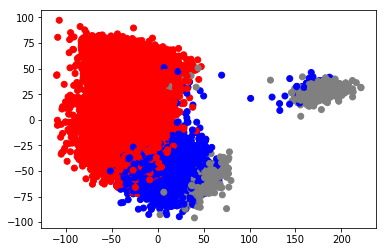

[[47.28571429 46.28571429 50.14285714 62.92857143 63.85714286 56.57142857
  12.42857143 12.85714286 10.35714286]
 [57.35294118 63.47058824 62.35294118 28.         33.         39.
   5.         14.          8.        ]
 [21.8        25.6        23.4        21.26666667 23.13333333 23.4
  65.2        64.53333333 60.46666667]]


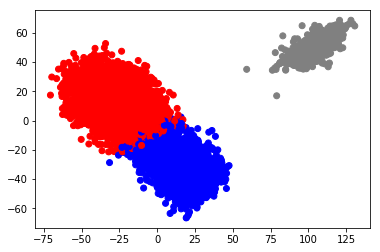

In [54]:
kmpp_clusters, kmpp_three_cen_cost, kmpp_three_mean_cost, kmm_centers = KPP(vectorized_players, vectorized_players[0,:], k=3)
print(kmm_centers)
plot_clusters(pca_dataset[:,0], pca_dataset[:,1], kmpp_clusters[:,-1])

kmpp_clusters, kmpp_three_cen_cost, kmpp_three_mean_cost, kmm_centers = KPP(sf, sf[0,:], k=3)
print(kmm_centers)
plot_clusters(sf_pca[:,0], sf_pca[:,1], kmpp_clusters[:,-1])

# sklearn Kmeans

[[53.88494152 39.19647356 61.44631911 62.65222657 40.77203448 54.10405414
  47.69880234 45.48612654 58.41601327 61.24507156 64.95458463 65.86432127
  61.5380104  63.72705956 63.88057752 57.85984837 67.8418445  69.34011191
  70.34329912 46.8939315  68.37208429 64.18267214 49.32933668 54.17686012
  50.08895179 63.69438381 66.94280132 65.02160304  9.87330677 11.65177386
  17.8471737  11.74573576 11.680949  ]
 [58.92243297 64.17655706 57.32811787 64.70773375 60.68443759 68.52743525
  60.47844478 55.30891772 55.92127747 69.02741294 72.76660254 72.56854433
  71.40714162 65.2940153  68.63498946 68.06704148 64.43055907 65.83848008
  63.02224978 62.18701375 53.96693889 39.98098873 65.42291969 62.8315622
  62.2460715  31.44406579 35.30250486 32.47831166  9.9024423  11.68481889
  16.7371505  11.59729128 11.56387949]
 [18.65272561 18.07075967 19.12818783 27.79424194 17.24149579 18.78082607
  17.6348909  18.46328004 32.96188028 23.79303687 45.05051587 45.39144031
  47.05928853 61.27175832 47.489340

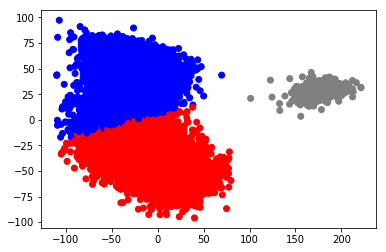

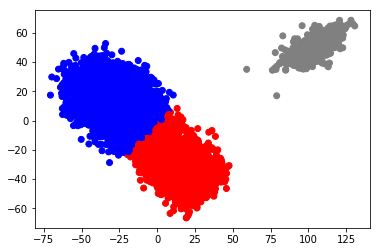

In [55]:
# KMeans Initialization
kmeans = KMeans(n_clusters=3, init='k-means++').fit(vectorized_players)
print(kmeans.cluster_centers_)
plot_clusters(pca_dataset[:,0], pca_dataset[:,1], kmeans.labels_)

pca_Kmeans = KMeans(n_clusters=3,  init='k-means++').fit(sf)
plot_clusters(sf_pca[:,0], sf_pca[:,1], pca_Kmeans.labels_)

[[58.92959779 64.17196009 57.32817179 64.7168664  60.68826447 68.52744055
  60.48211502 55.32097939 55.93663944 69.03042431 72.76177385 72.56382658
  71.39984134 65.29652314 68.63586987 68.07574549 64.43453468 65.84696823
  63.03024723 62.19609181 53.98419914 40.00462742 65.42260067 62.83888638
  62.24475629 31.46753204 35.3288922  32.50281536  9.9018083  11.68493198
  16.74333344 11.59748393 11.5657755 ]
 [53.8748349  39.18088709 61.44949446 62.64275938 40.75316339 54.09276589
  47.68564614 45.46806229 58.40474518 61.23639185 64.95262847 65.8631363
  61.53657185 63.72367558 63.87610041 57.84437284 67.841092   69.33554682
  70.3421443  46.87415528 68.36850038 64.18126327 49.31702088 54.16378655
  50.08057284 63.69941995 66.94484648 65.0259756   9.87382957 11.65165069
  17.84272136 11.7456861  11.67940898]
 [18.65272561 18.07075967 19.12818783 27.79424194 17.24149579 18.78082607
  17.6348909  18.46328004 32.96188028 23.79303687 45.05051587 45.39144031
  47.05928853 61.27175832 47.489340

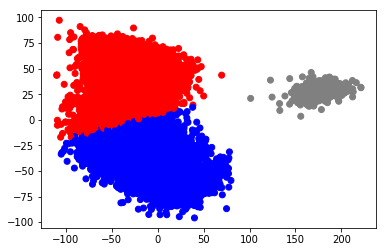

[[18.07075967 19.12818783 18.65272561 18.36306515 18.8942695  17.93449365
  68.36937145 64.9179642  65.64391712]
 [64.59410847 57.37669043 57.74662033 28.48183038 32.06355951 29.21143101
   9.92595111 11.63824356 11.57549453]
 [41.20957089 61.03367499 55.15766751 62.76228154 66.25722241 64.27208708
   9.85981807 11.686856   11.74705998]]


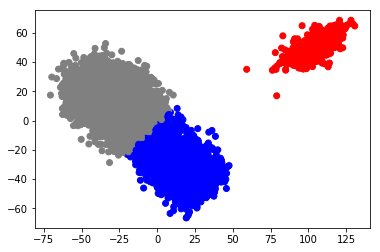

In [56]:
# Random Initialization
kmeans2 = KMeans(n_clusters=3, init='random').fit(vectorized_players)
print(kmeans2.cluster_centers_)
plot_clusters(pca_dataset[:,0], pca_dataset[:,1], kmeans2.labels_)

kmeans2 = KMeans(n_clusters=3, init='random').fit(sf)
print(kmeans2.cluster_centers_)
plot_clusters(sf_pca[:,0], sf_pca[:,1], kmeans2.labels_)